In [5]:
import pandas as pd
df = pd.read_csv(r'C:\Users\user\Desktop\data\Titanic Dataset\train.csv', usecols = ['Pclass', 'Age', 'Fare', 'Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [24]:
#### We tried to remove the replace the null values of the age with median of the distribution

df['Age'].fillna(df.Age.median(), inplace = True)
#### So, lets check if there is null values
df['Age'].isnull().sum()

0

In [25]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [26]:
####     standardization: We use the standard scalar from sklearn library
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
# fit & fit_transform
df_scaled = scaler.fit_transform(df)

In [23]:
pd.DataFrame(df_scaled)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

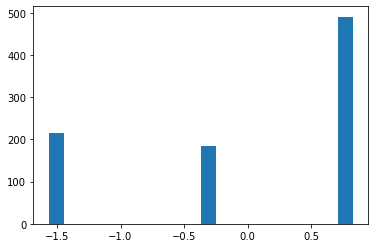

In [32]:
## We want to check the distribution based on survived
plt.hist(df_scaled[:, 1], bins = 20)
plt.show()

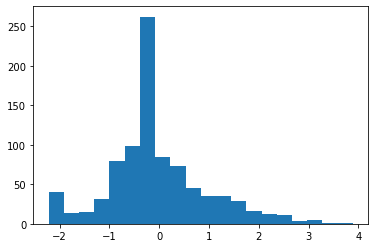

In [33]:
## We also want to check the disribution based on age
plt.hist(df_scaled[:, 2], bins = 20)
plt.show()

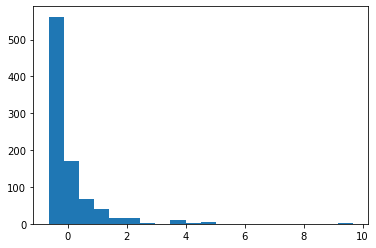

In [34]:
## And lastly to check the distribution based on fare
plt.hist(df_scaled[:, 3], bins = 20)
plt.show()

##### We can see that fair is a little bit left skewed

# Min Max Scaling (mostly used in CNN) -- Deep Learning Techniques
#### Min Max Scaling scales the values between 0 and 1

In [48]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
min_max_scaled = min_max.fit_transform(df)


In [49]:
pd.DataFrame(min_max.fit_transform(df), columns= df.columns)

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713
...,...,...,...,...
886,0.0,0.5,0.334004,0.025374
887,1.0,0.0,0.233476,0.058556
888,0.0,1.0,0.346569,0.045771
889,1.0,0.0,0.321438,0.058556


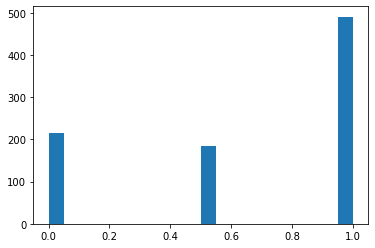

In [45]:
# Lets check the distribution
plt.hist(min_max_scaled[:, 1], bins = 20)
plt.show()

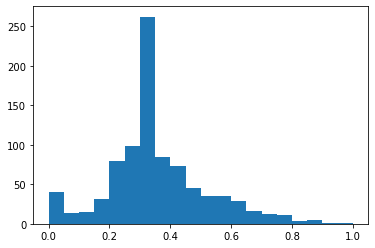

In [46]:
plt.hist(min_max_scaled[:, 2], bins = 20)
plt.show()

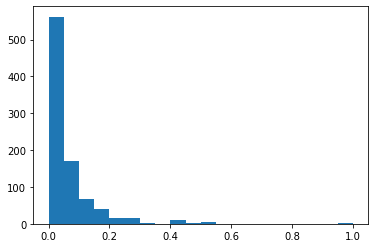

In [47]:
plt.hist(min_max_scaled[:, 3], bins = 20)
plt.show()

# Robust Scaler

- It is used to scale the feature to median and quantiles.
- Scaling using median and quantiles cosists of subtracting the median to all the observation and dividing it by the interquatile range.
- IQR = 75th percentile - 25th percentile
- X_scaled = (X - X.median)/IQR

In [51]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust = scaler.fit_transform(df)
df_robust

array([[ 0.        ,  0.        , -0.46153846, -0.3120106 ],
       [ 1.        , -2.        ,  0.76923077,  2.46124229],
       [ 1.        ,  0.        , -0.15384615, -0.28277666],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.38960398],
       [ 1.        , -2.        , -0.15384615,  0.67328148],
       [ 0.        ,  0.        ,  0.30769231, -0.29035583]])

In [52]:
pd.DataFrame(df_robust, columns= df.columns)

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363
...,...,...,...,...
886,0.0,-1.0,-0.076923,-0.062981
887,1.0,-2.0,-0.692308,0.673281
888,0.0,0.0,0.000000,0.389604
889,1.0,-2.0,-0.153846,0.673281


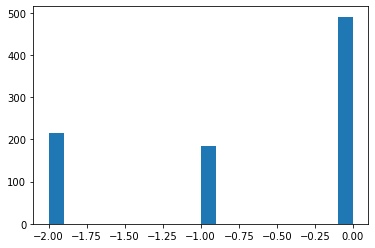

In [53]:
# Lets check the distribution
plt.hist(df_robust[:, 1], bins = 20)
plt.show()

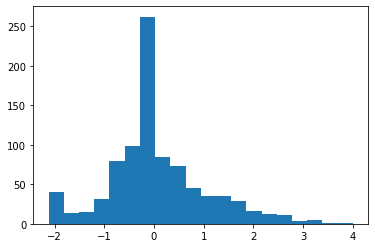

In [54]:
plt.hist(df_robust[:, 2], bins = 20)
plt.show()

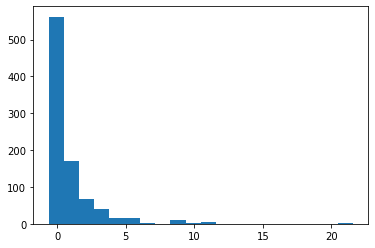

In [55]:
plt.hist(df_robust[:, 3], bins = 20)
plt.show()

# Normalization

#### Gaussian Transformation

some machine learning algorithms like linear regression and logistic assume that the features are normally distributed

- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation
- boxcox transformation

In [78]:
import pandas as pd
df_1 = pd.read_csv(r'C:\Users\user\Desktop\data\Titanic Dataset\train.csv', usecols = ['Age', 'Fare', 'Survived'])
df_1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [79]:
### fillnan
df_1['Age'] = df_1['Age'].fillna(df_1['Age'].median())
df_1.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [99]:
import scipy.stats as stat
import pylab

In [100]:
#### Whether feature is guassian or normal distributed
#### Q-Q plot

def plot_data(df_1, feature):
    plt.figure(figsize=(10, 6))
    # Im going to plot to diagram, left and right
    # left, will be the distribution in histogram
    # Right will be the Q-Q plot
    plt.subplot(1, 2, 1)
    df_1[feature].hist()
    plt.subplot(1, 2, 2)
    stat.probplot(df_1[feature],dist = 'norm', plot = pylab)
    plt.show()

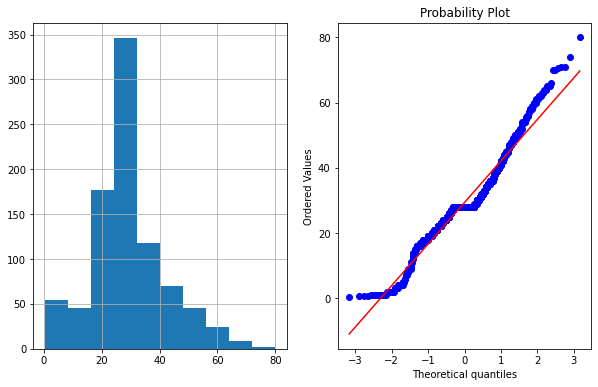

In [101]:
plot_data(df_1, 'Age')

## Logarithmic Transformation

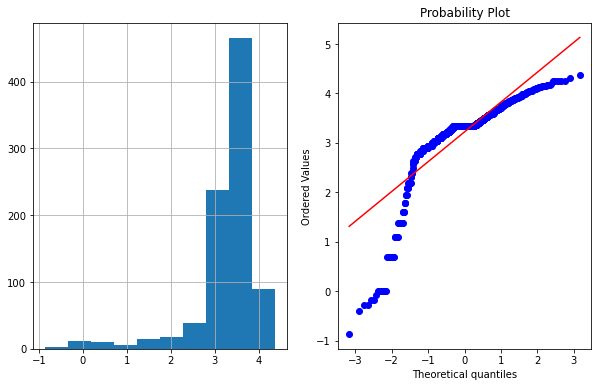

In [104]:
import numpy as np
df_1['Age_log'] = np.log(df_1['Age'])
plot_data(df_1, 'Age_log')

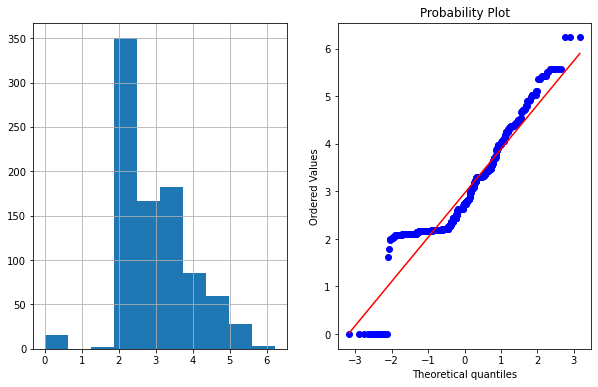

In [136]:
df_1['Fare_log'] = np.log1p(df_1['Fare'])
plot_data(df_1, 'Fare_log')

## Reciprocal Transformation

So logarithmic transformation does not makes it suitable

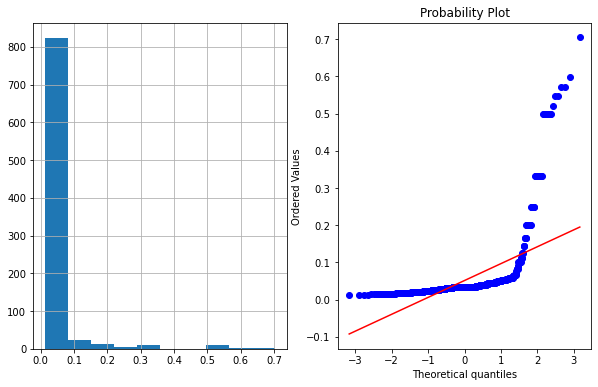

In [141]:
df_1['Age_reciprocal'] = np.reciprocal(df_1['Age']+1)
plot_data(df_1, 'Age_reciprocal')

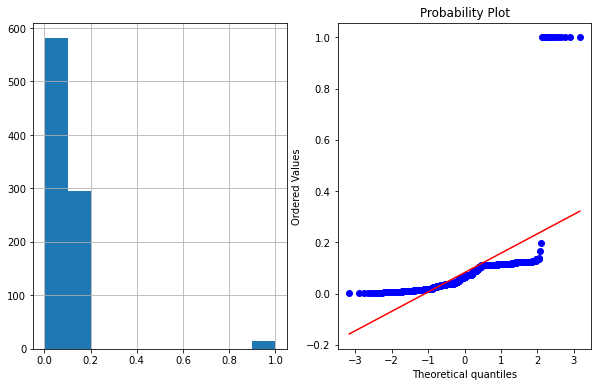

In [142]:
df_1['Fare_reciprocal'] = np.reciprocal(df_1['Fare']+ 1)
plot_data(df_1, 'Fare_reciprocal')

# Square Root Transformation


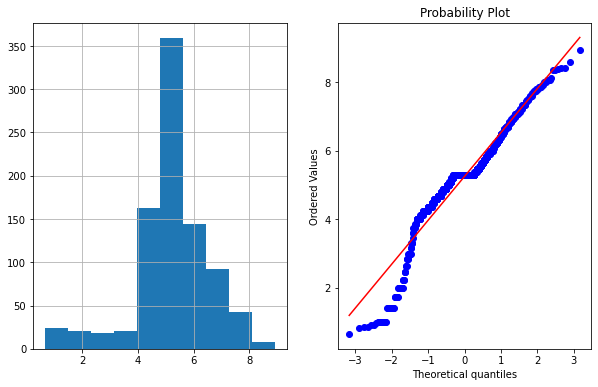

In [112]:
df_1['Age_sqare_root'] = np.sqrt(df_1['Age'])
plot_data(df_1, 'Age_sqare_root')

# Exponential Transformation

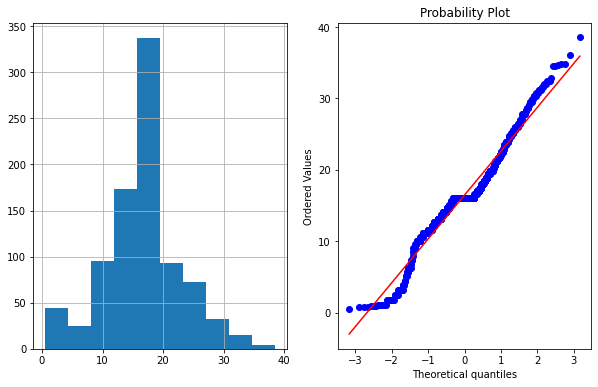

In [115]:
df_1['Age_exponential'] = df_1.Age ** (1/1.2)
plot_data(df_1, 'Age_exponential')

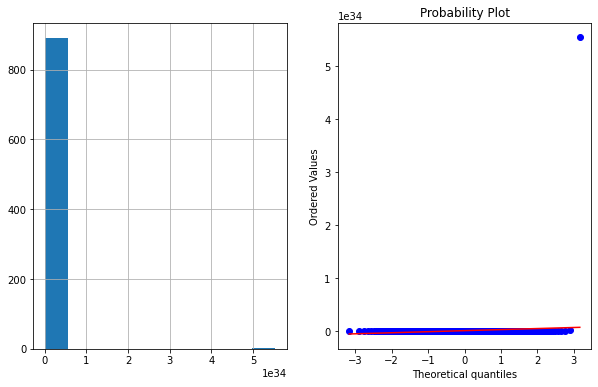

In [116]:
df_1['Age_exponential'] = np.exp(df_1.Age)
plot_data(df_1, 'Age_exponential')

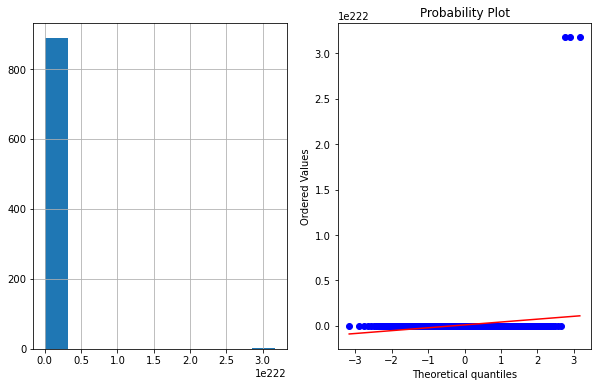

In [143]:
df_1['Fare_exponential'] = np.exp(df_1['Fare'])
plot_data(df_1, 'Fare_exponential')

# BoxCox Transformation

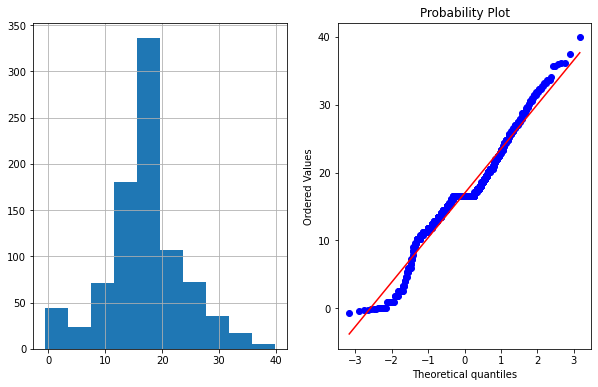

In [138]:
df_1['Age_boxcox'],parameters = stat.boxcox(df_1.Age)
plot_data(df_1, 'Age_boxcox')

In [128]:
print(parameters)

0.7964531473656952


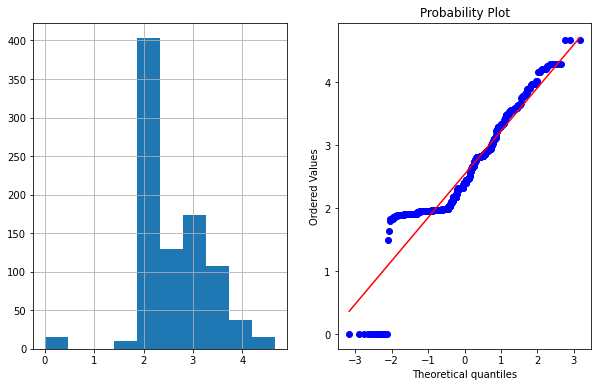

In [140]:
df_1['Fare_boxcox'],parameters = stat.boxcox(df_1['Fare']+1)
plot_data(df_1, 'Fare_boxcox')